In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np

import sys
import os

sys.path.append(os.environ['REPO_DIR'] + '/utilities')
from utilities2015 import *

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

from joblib import Parallel, delayed
import time
from collections import defaultdict

Setting environment for Gordon


In [2]:
labels = ['BackG', '5N', '7n', '7N', '12N', 'Pn', 'VLL', 
          '6N', 'Amb', 'R', 'Tz', 'RtTg', 'LRt', 'LC', 'AP', 'sp5']

labels_index = dict((j, i) for i, j in enumerate(labels))

labels_from_surround = dict( (l+'_surround', l) for l in labels[1:])

labels_surroundIncluded_list = labels[1:] + [l+'_surround' for l in labels[1:]]
labels_surroundIncluded = set(labels_surroundIncluded_list)

labels_surroundIncluded_index = dict((j, i) for i, j in enumerate(labels_surroundIncluded_list))

In [13]:
# stack = 'MD589'
stack = 'MD594'
first_bs_sec, last_bs_sec = section_range_lookup[stack]
first_detection_sec, last_detection_sec = detect_bbox_range_lookup[stack]

In [14]:
# Load sample locations

patches_rootdir = '/home/yuncong/CSHL_data_patches/'

import pandas as pd

table_filepath = os.path.join(patches_rootdir, '%(stack)s_indices_allLandmarks_allSections.h5'%{'stack':stack})
indices_allLandmarks_allSections = pd.read_hdf(table_filepath, 'indices_allLandmarks_allSections')
grid_parameters = pd.read_hdf(table_filepath, 'grid_parameters')

patch_size, stride, w, h = grid_parameters.tolist()
half_size = patch_size/2
ys, xs = np.meshgrid(np.arange(half_size, h-half_size, stride), np.arange(half_size, w-half_size, stride),
                 indexing='xy')
sample_locations = np.c_[xs.flat, ys.flat]

In [5]:
41155 in indices_allLandmarks_allSections[160]['sp5_surround']

True

In [74]:
def visualize_patches(stack, sec, indices, colors, titles=None):
    
    n = len(indices)
    
    single_color = len(np.atleast_2d(colors)) == 1
    
    dm = DataManager(stack=stack)

    img_fn = dm._get_image_filepath(stack=stack, section=sec, version='rgb-jpg')
    img = imread(img_fn)

    h, w = img.shape[:2]

    for i in range(n):
        ind = indices[i]

        xc, yc = sample_locations[ind]

        patch_ymin = max(0, yc-half_size)
        patch_ymax = min(h, yc+half_size)
        patch_xmin = max(0, xc-half_size)
        patch_xmax = min(w, xc+half_size)
        
        c = colors if single_color else colors[i]
            
        cv2.rectangle(img, (patch_xmin, patch_ymin), (patch_xmax, patch_ymax), tuple(c), 20)
        
        if titles is not None:
            title = titles[i]
            cv2.putText(img, title, (patch_xmin, patch_ymin-10), cv2.FONT_HERSHEY_DUPLEX, 2, (c), 3)
        
    return img

In [16]:
sec = 160

In [22]:
n_random_perClass = 10

In [23]:
colors = dict(zip(labels_surroundIncluded_list, np.random.randint(0, 255, (len(labels_surroundIncluded_list), 3))))

In [24]:
random_indices_allClasses = []
patch_colors = []

for name in indices_allLandmarks_allSections[sec].dropna().keys():
    if name == 'bg':
        continue
    indices = indices_allLandmarks_allSections[sec][name]
    
    n = min(n_random_perClass, len(indices))
    random_indices_allClasses += list(np.random.choice(indices, n, replace=False))
    patch_colors += [colors[name]] * n

In [40]:
dm = DataManager(stack=stack)

In [41]:
img_fn = dm._get_image_filepath(stack=stack, section=sec, version='rgb-jpg')
img = imread(img_fn)

h, w = img.shape[:2]

In [55]:
patches = []

iis = indices_allLandmarks_allSections[sec]['VLL_surround']

for ind in np.random.choice(iis, 10, replace=False):
    xc, yc = sample_locations[ind]
    patch_ymin = max(0, yc-half_size)
    patch_ymax = min(h, yc+half_size)
    patch_xmin = max(0, xc-half_size)
    patch_xmax = min(w, xc+half_size)
    
    patches.append(img[patch_ymin:patch_ymax+1, patch_xmin:patch_xmax+1].copy())

In [57]:
from visualization_utilities import *

In [76]:
img2 = annotation_overlay_on(img[::8,::8], stack, sec, structure_names=['7N', '5N', 'VLL', '7n'], users=['yuncong'], 
                             downscale_factor=8)

In [77]:
display_image(img2)

/oasis/projects/nsf/csd395/yuncong/Brain/learning/tmp.jpg

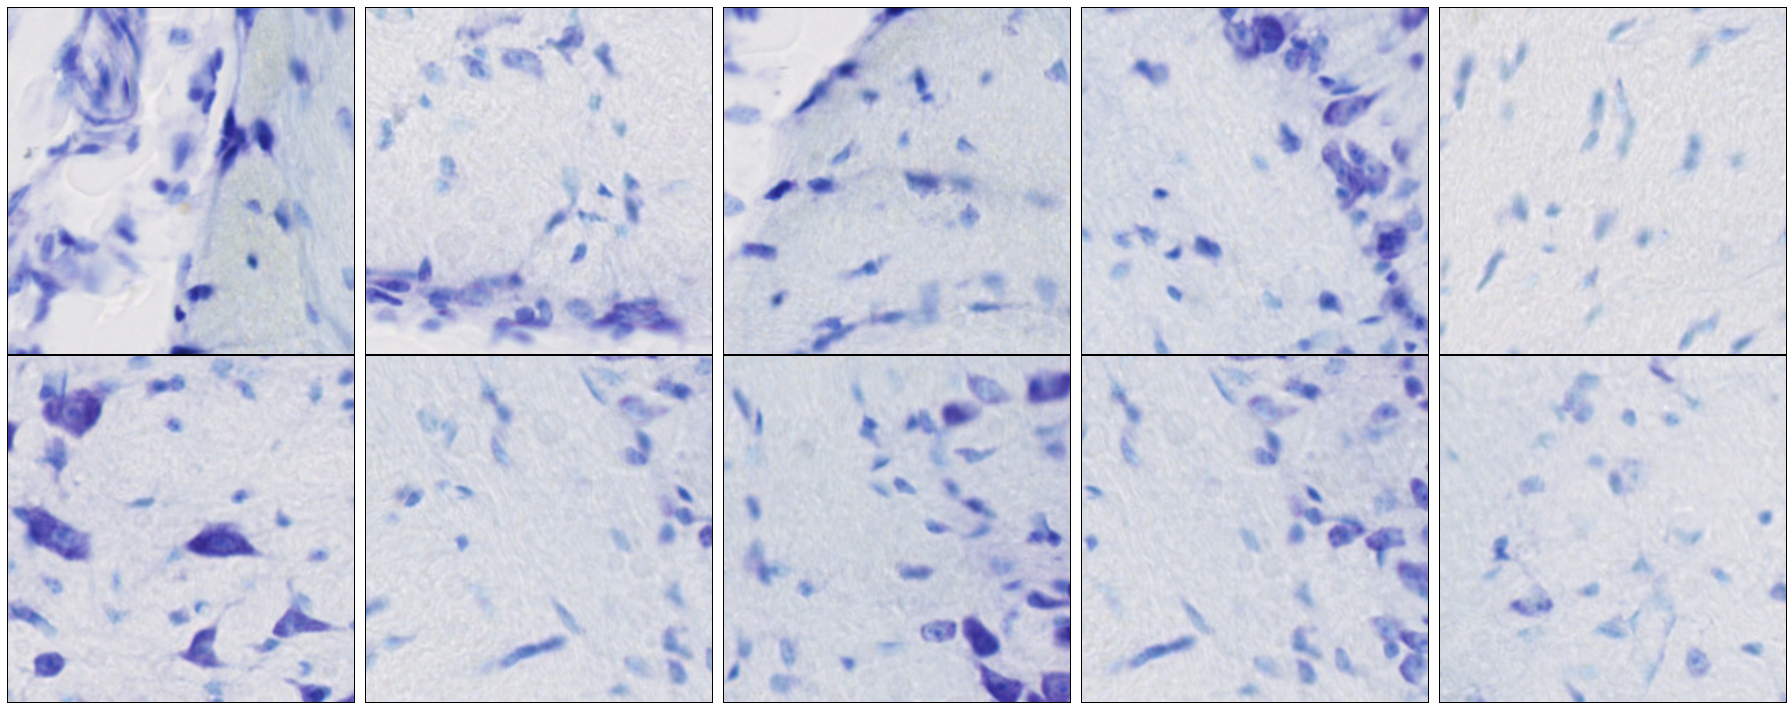

In [56]:
display_images_in_grids(patches, 5)

In [75]:
img = visualize_patches(stack, sec, random_indices_allClasses, patch_colors)

In [65]:
display_image(img[::8,::8])

/oasis/projects/nsf/csd395/yuncong/Brain/learning/tmp.jpg